WO: 0.2059, 0.2801; 0.07420000000000002
Beer: 1140.2, 1204.8; 64.59999999999991


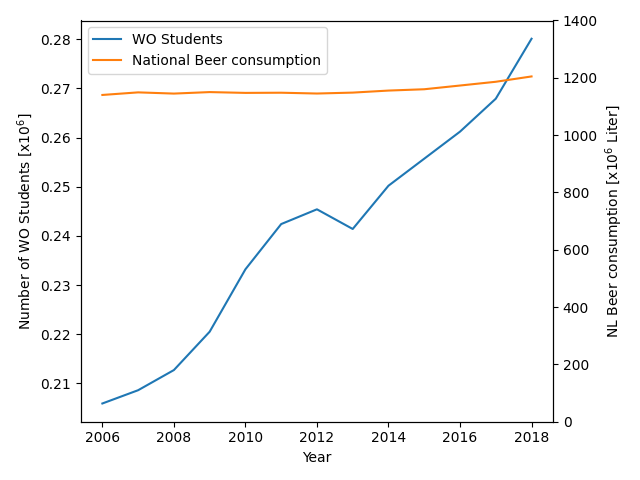

In [5]:
import matplotlib.pyplot as plt
import csv

%matplotlib widget

years           = []
wo              = [] # 10^3 Students
beerConsumption = [] # 10^6 Liter

with open("../data/istherecorrelation.csv", encoding="UTF-8-sig") as csvFile:
    csvReader = csv.reader(csvFile, delimiter=';')
    
    header = next(csvReader)

    for row in csvReader:
        # Replace Comma's with Dots for float conversion of stats
        year, student, beer = [stat.replace(',', '.') for stat in row]

        # Beer in 10^2 * 10^3 = 10^5 Liter

        years.append(float(year))
        wo.append(float(student) / 10**3)
        beerConsumption.append(float(beer) * 10**5  / 10**6)

# plot direct Data   
fig, ax1 = plt.subplots()
fig.set_tight_layout(True)

# A way to deal with matplotlib type hinting "Any" as secondary output instead of "Axes"
assert(isinstance(ax1, plt.Axes))

ax2 = ax1.twinx()

assert(isinstance(ax2, plt.Axes))

ax1.set_ylabel("Number of WO Students [x10$^{6}$]")
ax1.set_xlabel("Year")
ax2.set_ylabel("NL Beer consumption [x10$^{6}$ Liter]")

# ax1.set_ylim(0, 0.30)
ax2.set_ylim(0, 1400)

lines1 = ax1.plot(years, wo, label = "WO Students", color="tab:blue")
lines2 = ax2.plot(years, beerConsumption, label="National Beer consumption", color="tab:orange")

lines = lines1 + lines2
labels = [line.get_label() for line in lines]

ax1.legend(lines, labels, loc=2)
fig.savefig("../media/plotStudentNum.png", dpi=300)

print(f"WO: {min(wo)}, {max(wo)}; {max(wo) - min(wo)}")
print(f"Beer: {min(beerConsumption)}, {max(beerConsumption)}; {max(beerConsumption) - min(beerConsumption)}")

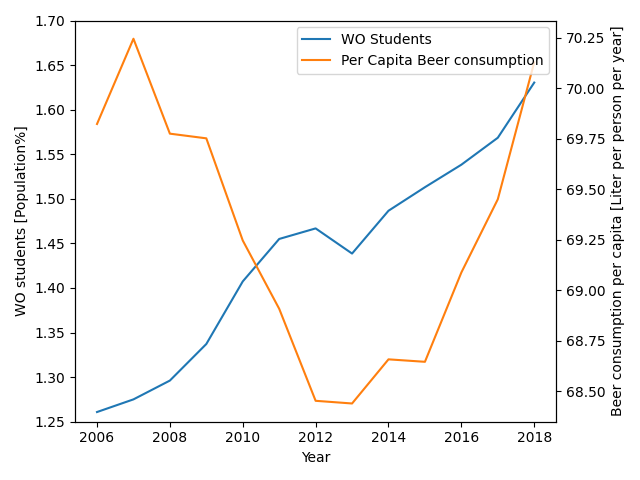

In [13]:
with open("../data/CBSPopulation.csv") as csvFile:
    csvReader = csv.reader(csvFile, delimiter=";")

    header = next(csvReader)

    populations = [] # 10^3 people

    for year, population in csvReader:
        if float(year) in years:
            # population in 10^6 people
            population = population.replace(',', '.')
            populations.append(float(population))

studentPercentage = [student / population * 100 for student, population in zip(wo, populations)]

perCapita = [(beer * 10**6) / (population * 10**6) for beer, population in zip(beerConsumption, populations)]


fig, ax1 = plt.subplots()
fig.set_tight_layout(True)

# A way to deal with matplotlib type hinting "Any" as secondary output instead of "Axes"
assert(isinstance(ax1, plt.Axes))

ax2 = ax1.twinx()

assert(isinstance(ax2, plt.Axes))

ax1.set_ylabel("WO students [Population%]")
ax1.set_xlabel("Year")

ax2.set_ylabel("Beer consumption per capita [Liter per person per year]")

ax1.set_ylim(1.25, 1.70)

lines1 = ax1.plot(years, studentPercentage, label = "WO Students", color="tab:blue")
lines2 = ax2.plot(years, perCapita, label="Per Capita Beer consumption", color="tab:orange")

lines = lines1 + lines2
labels = [line.get_label() for line in lines]

ax2.legend(lines, labels, loc=1)
fig.savefig("../media/plotPerCapita.png", dpi=300)